# Blog Project

## Objective

Here I will explain the objective of the project.

## Dataset Description

Here I will give infos to the dataset that will be used, such as the source and an overview of th features and targets.

## Import Libraries

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Model imports (e.g., logistic regression, random forest, etc.)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'matplotlib'

## Load Dataset

In [1]:
# Load data
df_raw = pd.read_csv('data/survey_results_public.csv')
df_questions = pd.read_csv('data/survey_results_schema.csv')

# Set the pandas option to show all columns when data frames are beeing visualised
pd.set_option('display.max_columns', None)

NameError: name 'pd' is not defined

In [145]:
# Print first rows of survey schema
print(df_questions.qname.unique())
print(df_raw.columns)

['MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check' 'CodingActivities'
 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc' 'YearsCode'
 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence' 'BuyNewTool'
 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal' 'Language'
 'Database' 'Platform' 'Webframe' 'Embedded' 'MiscTech' 'ToolsTech'
 'NEWCollabTools' 'OpSys' 'OfficeStackAsync' 'OfficeStackSync'
 'AISearchDev' 'NEWSOSites' 'SOVisitFreq' 'SOAccount' 'SOPartFreq' 'SOHow'
 'SOComm' 'AISelect' 'AISent' 'AIBen' 'AIAcc' 'AIComplex' 'AITool'
 'AINext' 'AIThreat' 'AIEthics' 'AIChallenges' 'TBranch' 'ICorPM'
 'WorkExp' 'Knowledge' 'Frequency' 'TimeSearching' 'TimeAnswering'
 'Frustration' 'ProfessionalTech' 'ProfessionalCloud'
 'ProfessionalQuestion' 'Industry' 'JobSat' 'JobSatPoints' 'SOTeamsUsage'
 'SurveyLength' 'SurveyEase' 'Knowledge_1' 'Knowledge_2' 'Knowledge_3'
 'Knowledge_4' 'Knowledge_5' 'Knowledge_6' 'Knowledge_7' 'Knowledge_8'
 'Knowledge_9' 'Frequency_1' 'Frequency_2' 'Fre

In [146]:
# Define columns to further analyse
cols_to_keep = df_questions.iloc[:8,1].to_list()
cols_to_keep.remove('Check')
cols_to_keep.extend(['ConvertedCompYearly', 'JobSat', 'Country'])
cols_to_keep

['MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'ConvertedCompYearly',
 'JobSat',
 'Country']

In [147]:
# Create a new dataframe that just contains the columns above defined
df_reduced = df_raw[cols_to_keep].copy()
df_reduced.head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,ConvertedCompYearly,JobSat,Country
0,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,United States of America
1,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,NaN,NaN,United Kingdom of Great Britain and Northern I...
2,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,NaN,NaN,United Kingdom of Great Britain and Northern I...
3,I am learning to code,18-24 years old,"Student, full-time",NaN,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",NaN,NaN,Canada
4,I am a developer by profession,18-24 years old,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",NaN,NaN,Norway


In [148]:
# Keep the survey results of respondents who answered "I am not primarily a developer,
# but I write code sometimes as part of my work/studies" or "I am a developer by profession"
main_branch = ["I am not primarily a developer, but I write code sometimes as part of my work/studies", "I am a developer by profession"]
df_reduced = df_reduced[df_reduced.MainBranch.isin(main_branch)]

In [149]:
# Keep the survey results of respondents who are employed, full-time
employed_full_time = "Employed, full-time"
df_reduced = df_reduced[df_reduced.Employment == employed_full_time]

# Drop Employment as it now only contains one unique value
df_reduced.drop(columns='Employment', inplace=True)

## Basic Cleaning

In [150]:
# Check for missing values
pd.set_option('display.max_rows', None)
print(df_reduced.isnull().sum().sort_values(ascending=False))
print(df_reduced.isnull().mean().sort_values(ascending=False))
pd.reset_option('display.max_rows')

ConvertedCompYearly    20107
JobSat                 15703
Country                 3602
LearnCode               2531
EdLevel                 2375
CodingActivities         239
RemoteWork                10
MainBranch                 0
Age                        0
dtype: int64
ConvertedCompYearly    0.533441
JobSat                 0.416603
Country                0.095562
LearnCode              0.067148
EdLevel                0.063009
CodingActivities       0.006341
RemoteWork             0.000265
MainBranch             0.000000
Age                    0.000000
dtype: float64


In [151]:
# Drop rows where the target JobSat is missing
df_cleaned = df_reduced[df_reduced.JobSat.notnull()]

# Repeat check for missing values
print(df_cleaned.isnull().sum().sort_values(ascending=False))
print(df_cleaned.isnull().mean().sort_values(ascending=False))

ConvertedCompYearly    9446
LearnCode                34
CodingActivities          5
RemoteWork                3
MainBranch                0
Age                       0
EdLevel                   0
JobSat                    0
Country                   0
dtype: int64
ConvertedCompYearly    0.429559
LearnCode              0.001546
CodingActivities       0.000227
RemoteWork             0.000136
MainBranch             0.000000
Age                    0.000000
EdLevel                0.000000
JobSat                 0.000000
Country                0.000000
dtype: float64


In [152]:
# Drop columns where over 70% of values are missing
# columns_to_drop = df_cleaned.columns[(df_cleaned.isnull().mean() >= 0.7)]
# df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [153]:
# Check shape of df_survey after dropping rows and columns
print("Before dropping: ", df_reduced.shape)
print("After dropping: ", df_cleaned.shape)

Before dropping:  (37693, 9)
After dropping:  (21990, 9)


## Initial EDA

### Data Types

In [154]:
# Check data types
pd.set_option('display.max_rows', None)
print("Data types: \n", df_cleaned.dtypes.sort_values())
pd.reset_option('display.max_rows')

Data types: 
 ConvertedCompYearly    float64
JobSat                 float64
MainBranch              object
Age                     object
RemoteWork              object
CodingActivities        object
EdLevel                 object
LearnCode               object
Country                 object
dtype: object


In [155]:
# Examine amount of unique values of categorical variables
pd.set_option('display.max_rows', None)
print(df_cleaned.select_dtypes(include='object').nunique().sort_values())
pd.reset_option('display.max_rows')

MainBranch            2
RemoteWork            3
Age                   8
EdLevel               8
CodingActivities     98
Country             157
LearnCode           363
dtype: int64


In [156]:
# Identify how often the each country in column "Country" occur
count_countries = df_cleaned.Country.value_counts(normalize=True)

# Identify countries that make up less than 1% of all countries
under_one_percent = count_countries[count_countries < 0.01].index

# Reassing the identified countries to "Other" and create new column "Country_simplified"
df_cleaned["Country_simplified"] = np.where(df_cleaned.Country.isin(under_one_percent), "Other", df_cleaned.Country)

# Remove original "Country" column
df_cleaned.drop(columns=["Country"], inplace=True)

# Check value_counts
df_cleaned.Country_simplified.value_counts()

/var/folders/sd/m93jcv6j64j79l56mv79pfhw0000gn/T/ipykernel_4109/4012638787.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Country_simplified"] = np.where(df_cleaned.Country.isin(under_one_percent), "Other", df_cleaned.Country)
/var/folders/sd/m93jcv6j64j79l56mv79pfhw0000gn/T/ipykernel_4109/4012638787.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=["Country"], inplace=True)


Country_simplified
Other                                                   5461
United States of America                                4634
Germany                                                 1887
India                                                   1664
United Kingdom of Great Britain and Northern Ireland    1367
Ukraine                                                  839
France                                                   775
Canada                                                   769
Brazil                                                   541
Italy                                                    529
Netherlands                                              514
Spain                                                    493
Poland                                                   466
Australia                                                466
Sweden                                                   439
Switzerland                                              339
Russi

In [157]:
# Identify columns with high cardinality
cat_cols = df_cleaned.select_dtypes(include='object')
columns_to_drop = cat_cols.columns[cat_cols.nunique() >= 20]
columns_to_drop

Index(['CodingActivities', 'LearnCode'], dtype='object')

In [158]:
# Drop columns with high cardinality and check new shape and remaining columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [159]:
# Check new shape and remaining columns
print(df_cleaned.shape)
columns = df_cleaned.columns.to_list()
columns.sort()
print(columns)

(21990, 7)
['Age', 'ConvertedCompYearly', 'Country_simplified', 'EdLevel', 'JobSat', 'MainBranch', 'RemoteWork']


### Data Structure

In [160]:
# Dataset summary
print("Info: ")
df_cleaned.info()

# Shape of the dataset
print("\nShape: ", df_cleaned.shape)

# Column names
columns = df_cleaned.columns.to_list()
print("\nColumns: ", columns)

# First rows of the dataset
print("\nFirst two rows: \n", df_cleaned.head(2))

Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 21990 entries, 12 to 65412
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           21990 non-null  object 
 1   Age                  21990 non-null  object 
 2   RemoteWork           21987 non-null  object 
 3   EdLevel              21990 non-null  object 
 4   ConvertedCompYearly  12544 non-null  float64
 5   JobSat               21990 non-null  float64
 6   Country_simplified   21990 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.3+ MB

Shape:  (21990, 7)

Columns:  ['MainBranch', 'Age', 'RemoteWork', 'EdLevel', 'ConvertedCompYearly', 'JobSat', 'Country_simplified']

First two rows: 
                         MainBranch              Age  \
12  I am a developer by profession  35-44 years old   
15  I am a developer by profession  45-54 years old   

                              RemoteWork  \
12  Hybrid (some remote, 

### Summary Statistics

In [161]:
df_cleaned.Age.unique()

array(['35-44 years old', '45-54 years old', '25-34 years old',
       '55-64 years old', '18-24 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [162]:
# Summary statistics of numerical data
print("Numerical Data: \n", df_cleaned.describe())

# Summary statistics of categorical data
print("\nCategorical Data: \n", df_cleaned.describe(include=['object']))

Numerical Data: 
        ConvertedCompYearly        JobSat
count         1.254400e+04  21990.000000
mean          8.942110e+04      6.931060
std           1.435716e+05      2.063386
min           1.000000e+00      0.000000
25%           3.866600e+04      6.000000
50%           7.000000e+04      7.000000
75%           1.120000e+05      8.000000
max           9.000000e+06     10.000000

Categorical Data: 
                             MainBranch              Age  \
count                            21990            21990   
unique                               2                8   
top     I am a developer by profession  25-34 years old   
freq                             20668            10109   

                                  RemoteWork  \
count                                  21987   
unique                                     3   
top     Hybrid (some remote, some in-person)   
freq                                    9784   

                                             EdLevel Co

## Deeper EDA

### Univariate Analysis (Numerical)

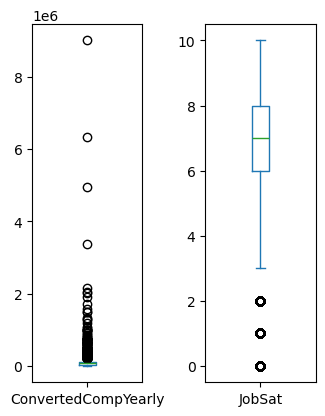

In [163]:
# Box plots for numerical data
df_cleaned.plot(kind="box", subplots=True, layout=(2, 7), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [164]:
# Identify outliers with the method interquartile range (IQR)
lower_bound = df_cleaned.ConvertedCompYearly.quantile(0.01)
upper_bound = df_cleaned.ConvertedCompYearly.quantile(0.99)
outliers = df_cleaned[(df_cleaned.ConvertedCompYearly < lower_bound) | (df_cleaned.ConvertedCompYearly > upper_bound)]
outliers

,MainBranch,Age,RemoteWork,EdLevel,ConvertedCompYearly,JobSat,Country_simplified
529,I am a developer by profession,25-34 years old,In-person,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",650000.0,6.0,United States of America
545,I am a developer by profession,35-44 years old,Remote,"Secondary school (e.g. American high school, G...",400000.0,8.0,United States of America
594,I am a developer by profession,25-34 years old,In-person,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",432000.0,8.0,United States of America
828,I am a developer by profession,35-44 years old,"Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1000000.0,8.0,United States of America
883,I am a developer by profession,45-54 years old,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",413.0,8.0,Other
...,...,...,...,...,...,...,...
40277,I am a developer by profession,25-34 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,6.0,Other
40353,I am a developer by profession,25-34 years old,"Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1.0,6.0,Germany
40872,I am a developer by profession,35-44 years old,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",63.0,8.0,Other
40985,I am a developer by profession,25-34 years old,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",45.0,3.0,Other


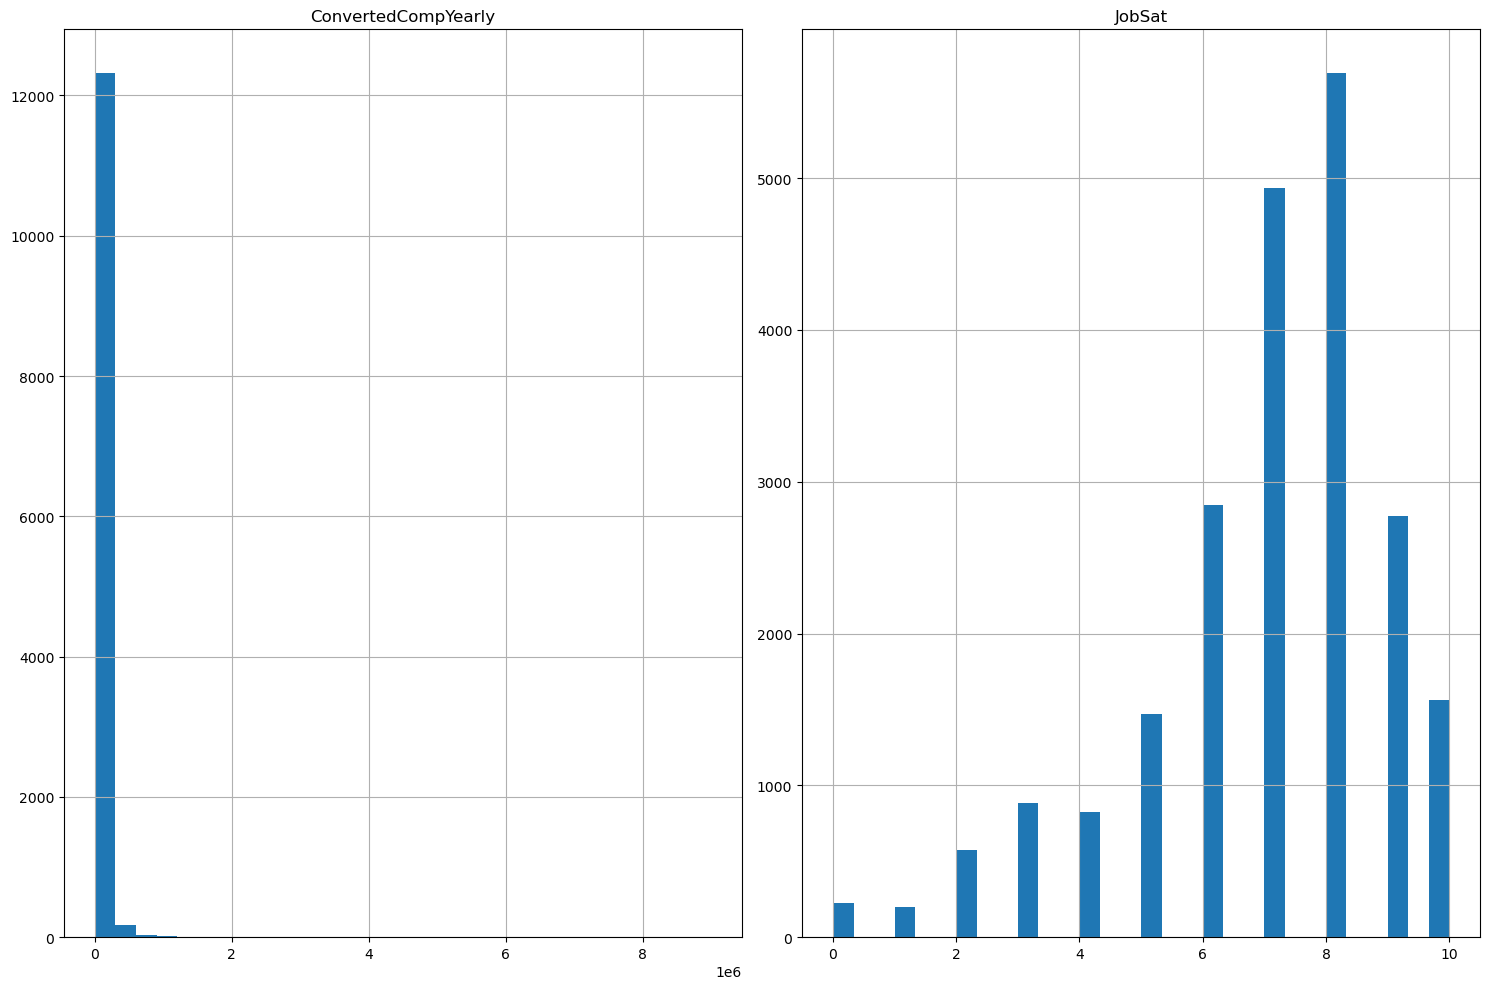

In [165]:
# Visualize distributions with histograms
df_cleaned.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Univariate Analysis (Categorical)

/var/folders/sd/m93jcv6j64j79l56mv79pfhw0000gn/T/ipykernel_4109/3364228715.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


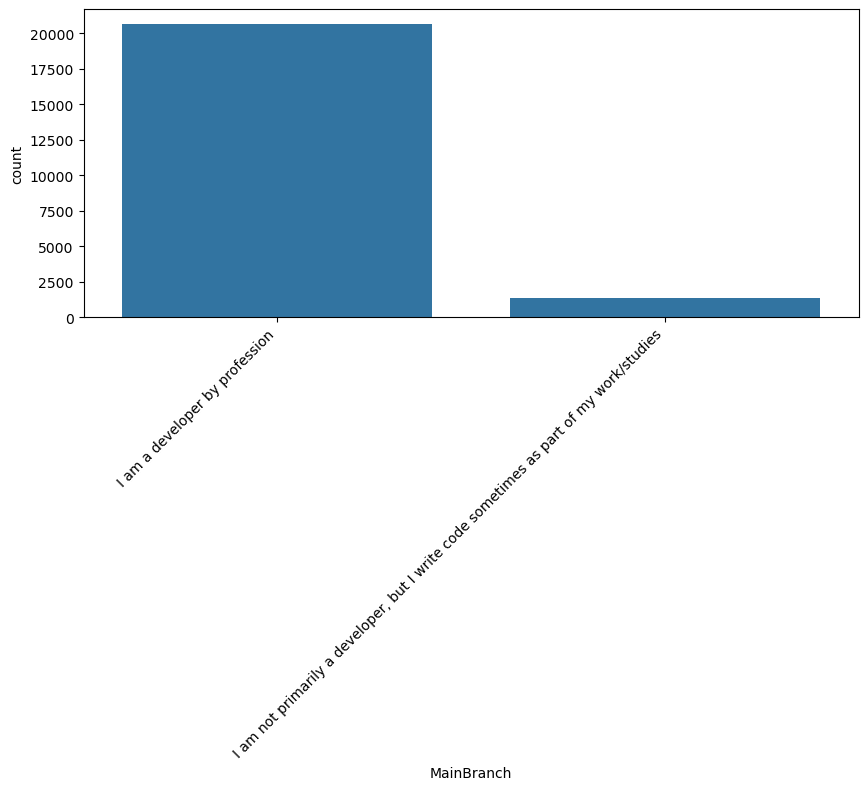

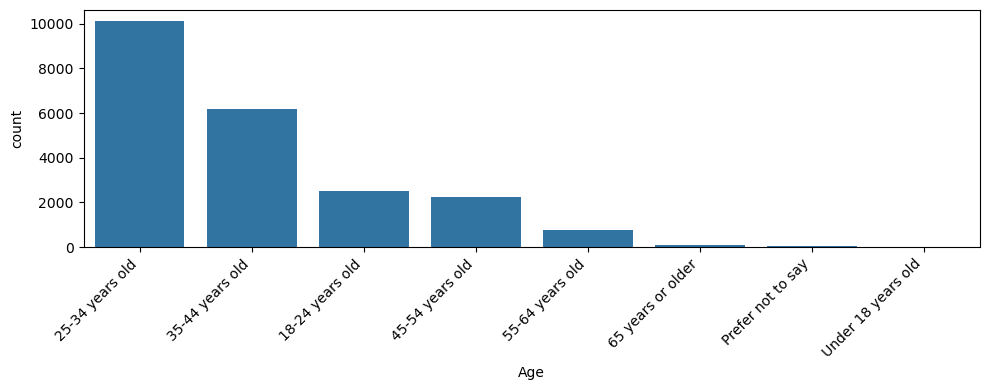

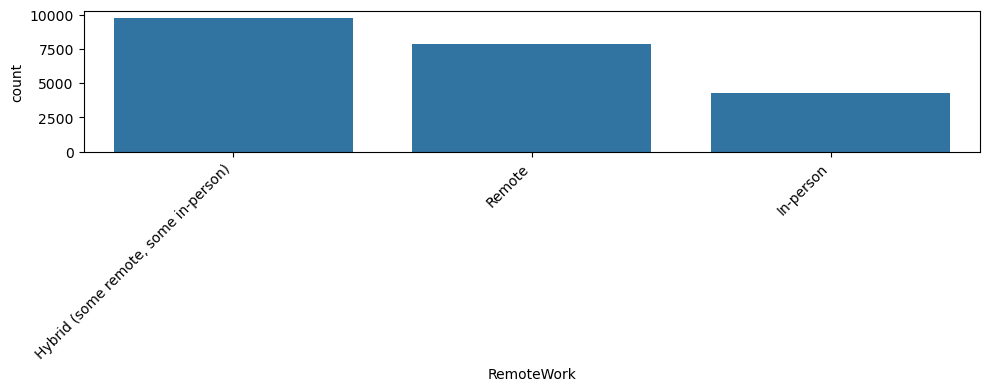

/var/folders/sd/m93jcv6j64j79l56mv79pfhw0000gn/T/ipykernel_4109/3364228715.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


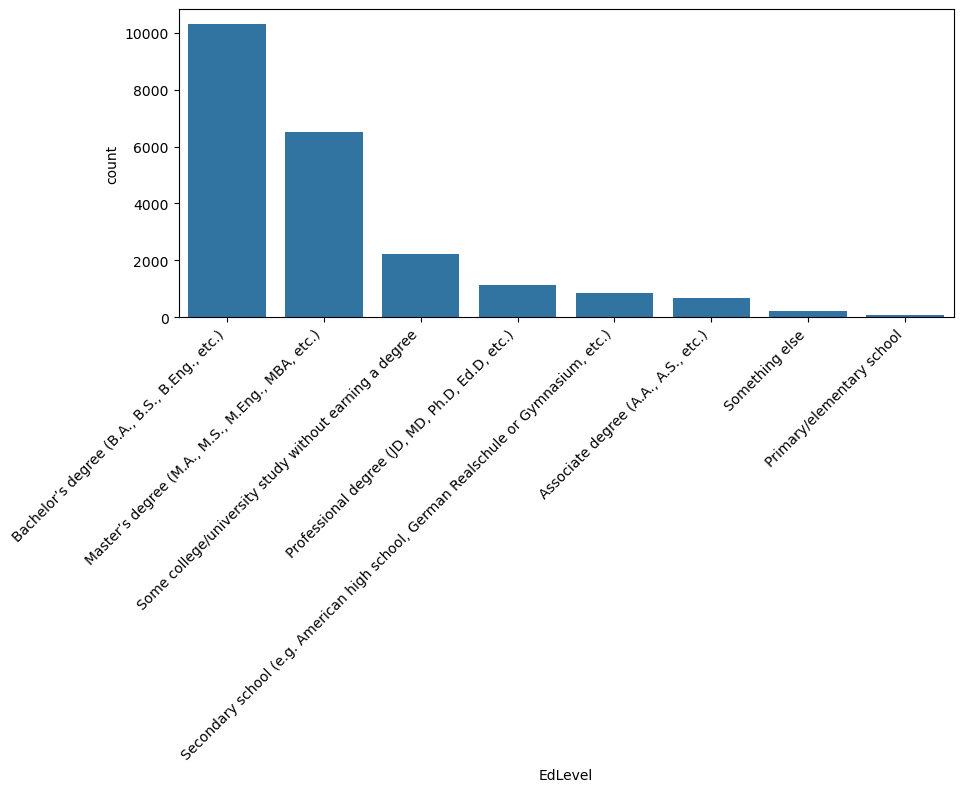

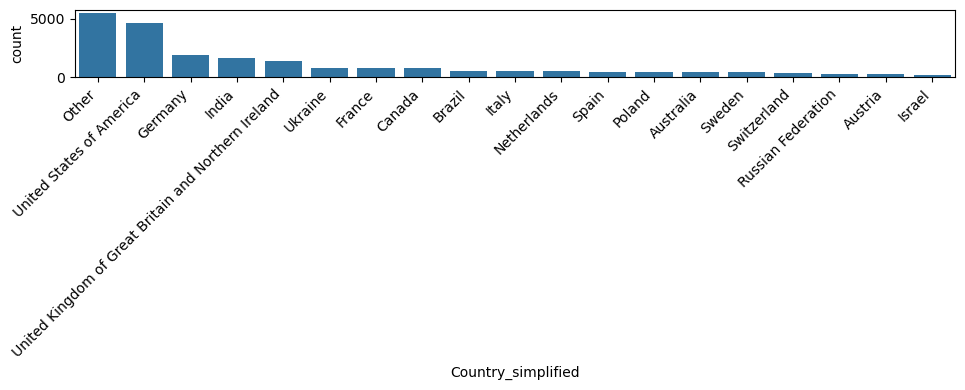

In [166]:
# Select categorical columns
cat_columns = df_cleaned.select_dtypes(include='object').columns

# Plot countplots for each categorical column
for col in cat_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df_cleaned, order=df_cleaned[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Bivariate Analysis (Numerical)

<Axes: >

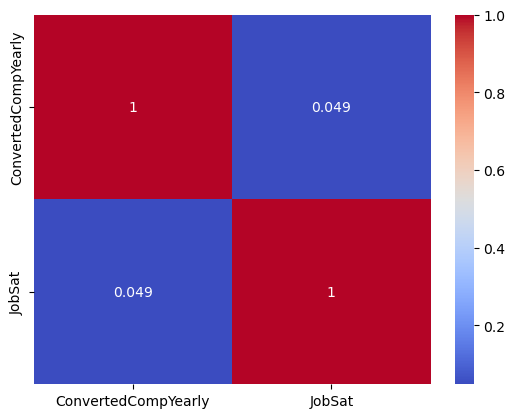

In [167]:
# Correlation matrix
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')

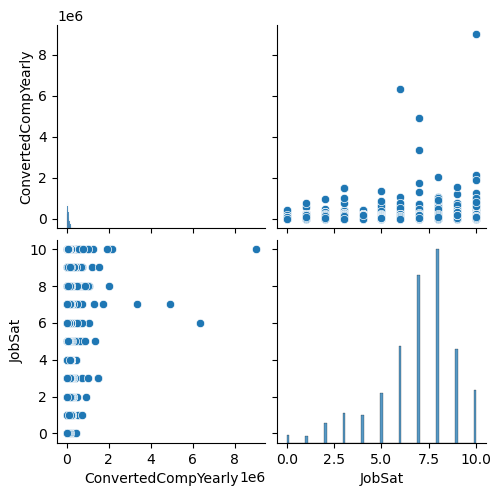

In [168]:
# Scatter plots
sns.pairplot(df_cleaned)
plt.show()

In [169]:
### Bivariate Analysis (Categorical)

/var/folders/sd/m93jcv6j64j79l56mv79pfhw0000gn/T/ipykernel_4109/3306702038.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


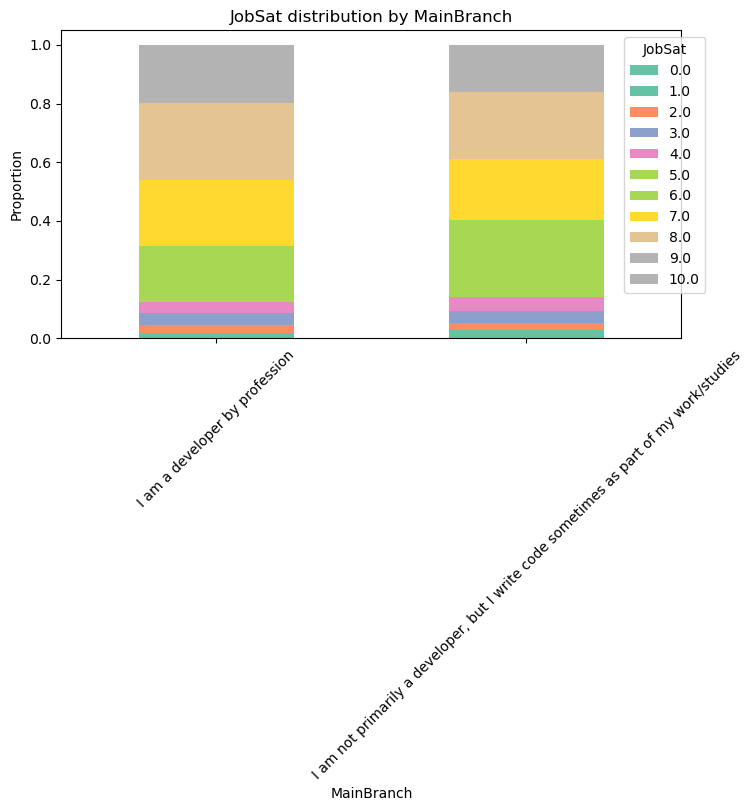

In [170]:
cross_tab = pd.crosstab(df_cleaned['MainBranch'], df_cleaned['JobSat'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set2')
plt.title('JobSat distribution by MainBranch')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='JobSat', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [171]:
pd.crosstab(df_cleaned['MainBranch'], df_cleaned['JobSat'], normalize='index')

JobSat,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
MainBranch,,,,,,,,,,,
I am a developer by profession,0.010161,0.008612,0.026127,0.040304,0.036965,0.064399,0.127637,0.225227,0.261128,0.128266,0.071173
"I am not primarily a developer, but I write code sometimes as part of my work/studies",0.012103,0.015129,0.025719,0.040091,0.046142,0.105144,0.157337,0.210287,0.226172,0.093797,0.068079


## Data Preparation

In [172]:
print("Before dropping outliers: ", df_cleaned.shape)

Before dropping outliers:  (21990, 7)


In [173]:
# Remove outliers in the column ConvertedCompYearly
# df_cleaned = df_cleaned[(df_cleaned.ConvertedCompYearly >= lower_bound) & (df_cleaned.ConvertedCompYearly <= upper_bound)]
df_cleaned = df_cleaned.drop(outliers.index)

In [174]:
print("After dropping outliers: ", df_cleaned.shape)
df_cleaned.ConvertedCompYearly.describe()

After dropping outliers:  (21739, 7)


count     12293.000000
mean      82736.920524
std       61580.328878
min         475.000000
25%       39544.000000
50%       70000.000000
75%      110622.000000
max      382164.000000
Name: ConvertedCompYearly, dtype: float64

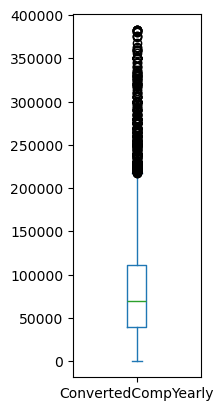

In [175]:
# Box plot for the feature ConvertedCompYearly without outliers
df_cleaned.ConvertedCompYearly.plot(kind="box", subplots=True, layout=(2, 7), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

## Train-Test Split

In [176]:
# Label encoding for "MainBranch"
df_cleaned['MainBranch_encoded'] = df_cleaned.MainBranch.map({"I am a developer by profession": 1,
                                                              "I am not primarily a developer, but I write code sometimes " \
                                                              "as part of my work/studies": 2})
df_cleaned.drop(columns='MainBranch', inplace=True)

In [177]:
# Ordinal encoding for "Age"
age_map = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    '': np.nan
}

df_cleaned['Age_encoded'] = df_cleaned.Age.map(age_map)
df_cleaned.drop(columns='Age', inplace=True)
df_cleaned.dropna(subset=["Age_encoded"], inplace=True)

In [178]:
df_cleaned.Age_encoded.unique()

array([3., 4., 2., 5., 1., 6., 0.])

In [179]:
df_cleaned.columns
df_cleaned.RemoteWork.unique()

array(['Hybrid (some remote, some in-person)', 'Remote', 'In-person', nan],
      dtype=object)

In [180]:
# Ordinal encoding for "EdLevel"
education_map = {
    'Primary/elementary school': 0,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,
    'Some college/university study without earning a degree': 2,
    'Associate degree (A.A., A.S., etc.)': 3,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 5,
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 6,
    'Something else': np.nan
}

df_cleaned['EdLevel_encoded'] = df_cleaned.EdLevel.map(education_map)
df_cleaned.drop(columns='EdLevel', inplace=True)
df_cleaned.dropna(subset=['EdLevel_encoded'], inplace=True)

In [181]:
# Split the data into features X and target y
y = df_cleaned.JobSat
X = df_cleaned.drop('JobSat', axis=1)

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [182]:
# One-hot encoding for "Remote Work"
X_train_encoded = pd.get_dummies(X_train, columns=['RemoteWork'], prefix='RemoteWork', dummy_na=True)
X_test_encoded = pd.get_dummies(X_test, columns=['RemoteWork'], prefix='RemoteWork', dummy_na=True)

X_train_encoded

,ConvertedCompYearly,Country_simplified,MainBranch_encoded,Age_encoded,EdLevel_encoded,"RemoteWork_Hybrid (some remote, some in-person)",RemoteWork_In-person,RemoteWork_Remote,RemoteWork_nan
21920,125000.0,United States of America,1,2.0,2.0,False,False,True,False
44288,NaN,United States of America,1,2.0,4.0,False,False,True,False
36042,NaN,India,2,3.0,5.0,True,False,False,False
14813,36000.0,Other,1,2.0,4.0,False,False,True,False
45961,NaN,Netherlands,1,3.0,2.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...
34358,1869.0,Other,1,2.0,5.0,False,False,True,False
54082,NaN,United States of America,1,3.0,4.0,False,False,True,False
24939,40814.0,Germany,1,1.0,1.0,True,False,False,False
27816,146496.0,United Kingdom of Great Britain and Northern I...,1,3.0,4.0,True,False,False,False


In [183]:
# Target encoding for feature "Country"
# Create Xy_train to create target mean
Xy_train = X_train.copy()
Xy_train['JobSat'] = y_train
mean_job_sat_train = Xy_train.groupby('Country_simplified')['JobSat'].mean()

# Encode X_train and X_test
X_train_encoded['Country_encoded'] = X_train_encoded.Country_simplified.map(mean_job_sat_train)
X_test_encoded['Country_encoded'] = X_test_encoded.Country_simplified.map(mean_job_sat_train)

# Drop the original column "Country"
X_train_encoded.drop(columns='Country_simplified', inplace=True)
X_test_encoded.drop(columns='Country_simplified', inplace=True)

X_train_encoded

,ConvertedCompYearly,MainBranch_encoded,Age_encoded,EdLevel_encoded,"RemoteWork_Hybrid (some remote, some in-person)",RemoteWork_In-person,RemoteWork_Remote,RemoteWork_nan,Country_encoded
21920,125000.0,1,2.0,2.0,False,False,True,False,6.992110
44288,NaN,1,2.0,4.0,False,False,True,False,6.992110
36042,NaN,2,3.0,5.0,True,False,False,False,6.720390
14813,36000.0,1,2.0,4.0,False,False,True,False,6.852238
45961,NaN,1,3.0,2.0,True,False,False,False,7.093137
...,...,...,...,...,...,...,...,...,...
34358,1869.0,1,2.0,5.0,False,False,True,False,6.852238
54082,NaN,1,3.0,4.0,False,False,True,False,6.992110
24939,40814.0,1,1.0,1.0,True,False,False,False,6.793836
27816,146496.0,1,3.0,4.0,True,False,False,False,6.729934


### Feature Engineering

In [184]:
# Fill missing values in "ConvertedCompYearly"
imputer = SimpleImputer(strategy='median')

imputer.fit(X_train_encoded[['ConvertedCompYearly']])

X_train_imputed = X_train_encoded.copy()
X_test_imputed = X_test_encoded.copy()

X_train_imputed["ConvertedCompYearly"] = imputer.transform(X_train_encoded[['ConvertedCompYearly']])
X_test_imputed["ConvertedCompYearly"] = imputer.transform(X_test_encoded[['ConvertedCompYearly']])

In [185]:
# Scale "ConvertedCompYearly"
scaler = StandardScaler()

X_train_scaled = X_train_imputed.copy()
X_test_scaled = X_test_imputed.copy()

X_train_scaled["ConvertedCompYearly"] = scaler.fit_transform(X_train_imputed[["ConvertedCompYearly"]])
X_test_scaled["ConvertedCompYearly"] = scaler.transform(X_test_imputed[["ConvertedCompYearly"]])

In [186]:
X_train_scaled

,ConvertedCompYearly,MainBranch_encoded,Age_encoded,EdLevel_encoded,"RemoteWork_Hybrid (some remote, some in-person)",RemoteWork_In-person,RemoteWork_Remote,RemoteWork_nan,Country_encoded
21920,1.026699,1,2.0,2.0,False,False,True,False,6.992110
44288,-0.149504,1,2.0,4.0,False,False,True,False,6.992110
36042,-0.149504,2,3.0,5.0,True,False,False,False,6.720390
14813,-0.870196,1,2.0,4.0,False,False,True,False,6.852238
45961,-0.149504,1,3.0,2.0,True,False,False,False,7.093137
...,...,...,...,...,...,...,...,...,...
34358,-1.597645,1,2.0,5.0,False,False,True,False,6.852238
54082,-0.149504,1,3.0,4.0,False,False,True,False,6.992110
24939,-0.767593,1,1.0,1.0,True,False,False,False,6.793836
27816,1.484853,1,3.0,4.0,True,False,False,False,6.729934


## Model Selection & Model Training & Evaluation

### 1. Baseline Model: Linear Regression

In [187]:
# Simple LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)

In [188]:
# Run evaluations

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

MAE: 1.5530614944378776
RMSE: 2.0426100783762235
R² Score: 0.0055815914136772005


### 2. Model 2: Random Forest Regressor

In [190]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

In [191]:
# Run evaluations

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))

MAE: 1.7101268345392846
RMSE: 2.214464233228623
R² Score: -0.16878749100458523
